# Taxas de rendimento no EM do RJ
---

Dados de Taxa de Rendimento (aprovação, reprovação e abandono) a nível de escola disponibilizados pelo [INEP](http://portal.inep.gov.br/web/guest/indicadores-educacionais), calculado através do Censo Escolar.

> *As taxas de rendimento escolar de cada instituição são geradas a partir da soma da quantidade de alunos aprovados, reprovados e que abandonaram a escola ao final de um ano letivo. Elas são importantes porque geram o Indicador de Rendimento, utilizado no cálculo do Ideb.*
> 
> *Para calcular as taxas de aprovação, reprovação e abandono, o Inep se baseia em informações sobre o movimento e o rendimento escolar dos alunos, fornecidas pelas escolas e pelas redes de ensino municipais, estaduais e federais. - [Taxas de Rendimento | Academia QEdu](https://academia.qedu.org.br/censo-escolar/taxa-de-rendimento/)*

## Resumo

- 24 (80%) das 30 escolas com maior reprovação e 22 (70%) das 30 escolas com maior abandono estão na cidade do Rio, embora a cidade concentre apenas 22% das escolas estaduais.

### Import required libraries

In [1]:
# IMPORT CONFIGs
import os
import sys
sys.path.insert(0, '../')
sys.path.insert(0, '../scripts')
from config import RAW_PATH, TREAT_PATH, OUTPUT_PATH


# DATA ANALYSIS & VIZ TOOLS
from copy import deepcopy

import pandas as pd
import seaborn as sns
pd.options.display.max_columns = 999

%pylab inline
pylab.rcParams['figure.figsize'] = (12, 12)


# For changes in .py
%reload_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


### Import data

In [2]:
os.listdir(RAW_PATH)

['TX_REND_ESCOLAS_2018',
 '.DS_Store',
 'tcc_fernanda_scovino.docx',
 '.keep',
 'TX_TRANSICAO_MUNICIPIOS_2014_2015.xlsx',
 'apresentacao_indicadores_de_fluxo_escolar_da_educacao_basica.pdf',
 'dicionario_tabelas.xlsx']

In [12]:
df = pd.read_excel(RAW_PATH / 'TX_REND_ESCOLAS_2018' / 'TX_REND_ESCOLAS_2018.xlsx', sheet_name='RJ')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8325 entries, 0 to 8324
Data columns (total 63 columns):
Ano                           8322 non-null object
Região                        8321 non-null object
UF                            8321 non-null object
Código do Município           8321 non-null object
Nome do Município             8321 non-null object
Código da Escola              8321 non-null object
Nome da Escola                8321 non-null object
Localização                   8321 non-null object
Dependência Administrativa    8321 non-null object
Taxa de Aprovação             8323 non-null object
Unnamed: 10                   8322 non-null object
Unnamed: 11                   8322 non-null object
Unnamed: 12                   8322 non-null object
Unnamed: 13                   8322 non-null object
Unnamed: 14                   8322 non-null object
Unnamed: 15                   8322 non-null object
Unnamed: 16                   8322 non-null object
Unnamed: 17               

In [85]:
# set columns name
df.columns = df.iloc[2]
df = df.drop([0, 1, 2]).reset_index(drop=True)

# fix null values
df = df.replace('--', np.nan)

# # removing unuseful data
del df['NO_REGIAO']
del df['SG_UF']

# indexing on schools codes
df.set_index('CO_ENTIDADE', drop=True, inplace=True)
df.columns.name = None
df.head()

,Ano,CO_MUNICIPIO,NO_MUNICIPIO,NO_ENTIDADE,TIPOLOCA,Dependad,tap_FUN,tap_F14,tap_F04,tap_F58,tap_F00,tap_F01,tap_F02,tap_F03,tap_F05,tap_F06,tap_F07,tap_F08,tap_MED,tap_M01,tap_M02,tap_M03,tap_M04,tap_MNS,tre_FUN,tre_F14,tre_F04,tre_F58,tre_F00,tre_F01,tre_F02,tre_F03,tre_F05,tre_F06,tre_F07,tre_F08,tre_MED,tre_M01,tre_M02,tre_M03,tre_M04,tre_MNS,tab_FUN,tab_F14,tab_F04,tab_F58,tab_F00,tab_F01,tab_F02,tab_F03,tab_F05,tab_F06,tab_F07,tab_F08,tab_MED,tab_M01,tab_M02,tab_M03,tab_M04,tab_MNS
CO_ENTIDADE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
33036594.0,2018,3300100.0,Angra dos Reis,CE NAZIRA SALOMAO,Urbana,Estadual,78.1,NaN,78.1,NaN,NaN,NaN,NaN,NaN,82.0,76.0,77.5,77.6,81.3,76.5,81.7,91.8,NaN,NaN,17.3,NaN,17.3,NaN,NaN,NaN,NaN,NaN,13.1,18.7,18.3,18.4,12.9,17.1,11.4,5.2,NaN,NaN,4.6,NaN,4.6,NaN,NaN,NaN,NaN,NaN,4.9,5.3,4.2,4.0,5.8,6.4,6.9,3.0,NaN,NaN
33036616.0,2018,3300100.0,Angra dos Reis,CENTRO EDUC LEONE ALMEIDA JD INF MUNDO M,Urbana,Privada,97.5,97.0,98.1,88.2,100.0,100.0,100.0,100.0,100.0,100.0,100.0,92.3,NaN,NaN,NaN,NaN,NaN,NaN,2.5,3.0,1.9,11.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.7,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
33036632.0,2018,3300100.0,Angra dos Reis,CIEP 055 JOAO GREGORIO GALINDO,Urbana,Estadual,94.6,NaN,94.6,NaN,NaN,NaN,NaN,NaN,81.0,100.0,93.8,100.0,91.7,80.0,95.3,98.6,NaN,NaN,3.9,NaN,3.9,NaN,NaN,NaN,NaN,NaN,19.0,0.0,2.1,0.0,8.3,20.0,4.7,1.4,NaN,NaN,1.5,NaN,1.5,NaN,NaN,NaN,NaN,NaN,0.0,0.0,4.1,0.0,0.0,0.0,0.0,0.0,NaN,NaN
33036640.0,2018,3300100.0,Angra dos Reis,CE DOUTOR ARTUR VARGAS,Urbana,Estadual,73.4,NaN,73.4,NaN,NaN,NaN,NaN,NaN,55.6,70.4,67.8,82.4,76.5,62.5,78.7,89.8,NaN,NaN,24.1,NaN,24.1,NaN,NaN,NaN,NaN,NaN,36.1,29.6,27.6,16.9,18.4,30.0,16.3,7.9,NaN,NaN,2.5,NaN,2.5,NaN,NaN,NaN,NaN,NaN,8.3,0.0,4.6,0.7,5.1,7.5,5.0,2.3,NaN,NaN
33036659.0,2018,3300100.0,Angra dos Reis,COL JEAN PIAGET,Urbana,Privada,98.2,100.0,95.7,100.0,100.0,100.0,100.0,100.0,97.1,97.4,92.6,94.7,94.4,93.2,90.2,100.0,NaN,NaN,1.8,0.0,4.3,0.0,0.0,0.0,0.0,0.0,2.9,2.6,7.4,5.3,5.6,6.8,9.8,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


## Filtering state high schools 

In [86]:
df['Dependad'].value_counts()

Municipal    3590
Privada      3508
Estadual     1172
Federal        50
Name: Dependad, dtype: int64

In [87]:
df_em_rj = df[df['Dependad'] == 'Estadual'].copy()
df_em_rj.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1172 entries, 33036594.0 to 33170240.0
Data columns (total 60 columns):
Ano             1172 non-null object
CO_MUNICIPIO    1172 non-null float64
NO_MUNICIPIO    1172 non-null object
NO_ENTIDADE     1172 non-null object
TIPOLOCA        1172 non-null object
Dependad        1172 non-null object
tap_FUN         622 non-null float64
tap_F14         10 non-null float64
tap_F04         622 non-null float64
tap_F58         5 non-null float64
tap_F00         7 non-null float64
tap_F01         9 non-null float64
tap_F02         10 non-null float64
tap_F03         4 non-null float64
tap_F05         517 non-null float64
tap_F06         557 non-null float64
tap_F07         608 non-null float64
tap_F08         610 non-null float64
tap_MED         1114 non-null float64
tap_M01         1096 non-null float64
tap_M02         1099 non-null float64
tap_M03         1089 non-null float64
tap_M04         0 non-null float64
tap_MNS         6 non-null float

In [88]:
df_em_rj = df_em_rj.dropna(subset=['tab_M01', 'tab_M02', 'tab_M03'])
df_em_rj

,Ano,CO_MUNICIPIO,NO_MUNICIPIO,NO_ENTIDADE,TIPOLOCA,Dependad,tap_FUN,tap_F14,tap_F04,tap_F58,tap_F00,tap_F01,tap_F02,tap_F03,tap_F05,tap_F06,tap_F07,tap_F08,tap_MED,tap_M01,tap_M02,tap_M03,tap_M04,tap_MNS,tre_FUN,tre_F14,tre_F04,tre_F58,tre_F00,tre_F01,tre_F02,tre_F03,tre_F05,tre_F06,tre_F07,tre_F08,tre_MED,tre_M01,tre_M02,tre_M03,tre_M04,tre_MNS,tab_FUN,tab_F14,tab_F04,tab_F58,tab_F00,tab_F01,tab_F02,tab_F03,tab_F05,tab_F06,tab_F07,tab_F08,tab_MED,tab_M01,tab_M02,tab_M03,tab_M04,tab_MNS
CO_ENTIDADE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
33036594.0,2018,3300100.0,Angra dos Reis,CE NAZIRA SALOMAO,Urbana,Estadual,78.1,NaN,78.1,NaN,NaN,NaN,NaN,NaN,82.0,76.0,77.5,77.6,81.3,76.5,81.7,91.8,NaN,NaN,17.3,NaN,17.3,NaN,NaN,NaN,NaN,NaN,13.1,18.7,18.3,18.4,12.9,17.1,11.4,5.2,NaN,NaN,4.6,NaN,4.6,NaN,NaN,NaN,NaN,NaN,4.9,5.3,4.2,4.0,5.8,6.4,6.9,3.0,NaN,NaN
33036632.0,2018,3300100.0,Angra dos Reis,CIEP 055 JOAO GREGORIO GALINDO,Urbana,Estadual,94.6,NaN,94.6,NaN,NaN,NaN,NaN,NaN,81.0,100.0,93.8,100.0,91.7,80.0,95.3,98.6,NaN,NaN,3.9,NaN,3.9,NaN,NaN,NaN,NaN,NaN,19.0,0.0,2.1,0.0,8.3,20.0,4.7,1.4,NaN,NaN,1.5,NaN,1.5,NaN,NaN,NaN,NaN,NaN,0.0,0.0,4.1,0.0,0.0,0.0,0.0,0.0,NaN,NaN
33036640.0,2018,3300100.0,Angra dos Reis,CE DOUTOR ARTUR VARGAS,Urbana,Estadual,73.4,NaN,73.4,NaN,NaN,NaN,NaN,NaN,55.6,70.4,67.8,82.4,76.5,62.5,78.7,89.8,NaN,NaN,24.1,NaN,24.1,NaN,NaN,NaN,NaN,NaN,36.1,29.6,27.6,16.9,18.4,30.0,16.3,7.9,NaN,NaN,2.5,NaN,2.5,NaN,NaN,NaN,NaN,NaN,8.3,0.0,4.6,0.7,5.1,7.5,5.0,2.3,NaN,NaN
33036691.0,2018,3300100.0,Angra dos Reis,CE CONDE PEREIRA CARNEIRO,Urbana,Estadual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.0,74.7,81.8,81.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.7,21.8,15.4,15.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.3,3.5,2.8,3.4,NaN,NaN
33036713.0,2018,3300100.0,Angra dos Reis,CE HONORIO LIMA,Urbana,Estadual,88.1,NaN,88.1,NaN,NaN,NaN,NaN,NaN,90.6,91.9,83.3,91.8,83.0,86.9,74.0,90.5,NaN,NaN,11.1,NaN,11.1,NaN,NaN,NaN,NaN,NaN,6.3,8.1,16.7,6.6,12.4,9.8,19.8,5.3,NaN,NaN,0.8,NaN,0.8,NaN,NaN,NaN,NaN,NaN,3.1,0.0,0.0,1.6,4.6,3.3,6.2,4.2,NaN,NaN
33037027.0,2018,3300100.0,Angra dos Reis,CE ANTONIO DIAS LIMA,Urbana,Estadual,92.9,NaN,92.9,NaN,NaN,NaN,NaN,NaN,95.9,91.7,94.5,88.7,75.5,61.7,79.5,91.9,NaN,NaN,6.8,NaN,6.8,NaN,NaN,NaN,NaN,NaN,4.1,6.9,5.5,11.3,24.5,38.3,20.5,8.1,NaN,NaN,0.3,NaN,0.3,NaN,NaN,NaN,NaN,NaN,0.0,1.4,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
33037230.0,2018,3300100.0,Angra dos Reis,CE LEOPOLDO AMERICO M DE MELLO,Urbana,Estadual,74.3,NaN,74.3,NaN,NaN,NaN,NaN,NaN,72.1,71.4,71.4,88.5,81.4,77.3,80.4,86.7,NaN,NaN,24.0,NaN,24.0,NaN,NaN,NaN,NaN,NaN,26.2,28.6,22.9,11.5,15.3,16.7,15.7,13.3,NaN,NaN,1.7,NaN,1.7,NaN,NaN,NaN,NaN,NaN,1.7,0.0,5.7,0.0,3.3,6.0,3.9,0.0,NaN,NaN
33037337.0,2018,3300100.0,Angra dos Reis,CE ROBERTO MONTENEGRO,Urbana,Estadual,75.1,NaN,75.1,NaN,NaN,NaN,NaN,NaN,78.4,73.0,75.0,75.2,80.0,77.8,73.2,92.1,NaN,NaN,24.6,NaN,24.6,NaN,NaN,NaN,NaN,NaN,21.6,26.1,25.0,24.8,19.6,22.2,26.8,6.3,NaN,NaN,0.3,NaN,0.3,NaN,NaN,NaN,NaN,NaN,0.0,0.9,0.0,0.0,0.4,0.0,0.0,1.6,NaN,NaN
33098077.0,2018,3300100.0,Angra dos Reis,CIEP 302 CHARLES DICKENS,Urbana,Estadual,80.1,NaN,80.1,NaN,NaN,NaN,NaN,NaN,83.1,81.2,66.2,88.2,71.9,58.5,74.0,93.9,NaN,NaN,19.9,NaN,19.9,NaN,NaN,NaN,NaN,NaN,16.9,18.8,33.8,11.8,19.7,30.9,17.1,2.6,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,8.4,10.6,8.9,3.5,NaN,NaN


## Exploring dataset

In [197]:
# Número de escolar por cidade
df_em_rj['NO_MUNICIPIO'].value_counts(normalize=True)

Rio de Janeiro                   0.226555
Nova Iguaçu                      0.066852
Duque de Caxias                  0.065924
São Gonçalo                      0.059424
Campos dos Goytacazes            0.044568
Belford Roxo                     0.032498
Niterói                          0.030641
São João de Meriti               0.029712
Volta Redonda                    0.021356
Nova Friburgo                    0.021356
Magé                             0.017642
Barra Mansa                      0.012999
Itaperuna                        0.012999
Itaboraí                         0.012999
Queimados                        0.011142
Angra dos Reis                   0.011142
Nilópolis                        0.011142
Valença                          0.010214
Resende                          0.010214
Itaguaí                          0.010214
Mesquita                         0.009285
Barra do Piraí                   0.009285
Macaé                            0.009285
Petrópolis                       0

In [198]:
# Número de escolas por tipo
df_em_rj['TIPOLOCA'].value_counts(normalize=True)

Urbana    0.920149
Rural     0.079851
Name: TIPOLOCA, dtype: float64

## Taxa de abandono

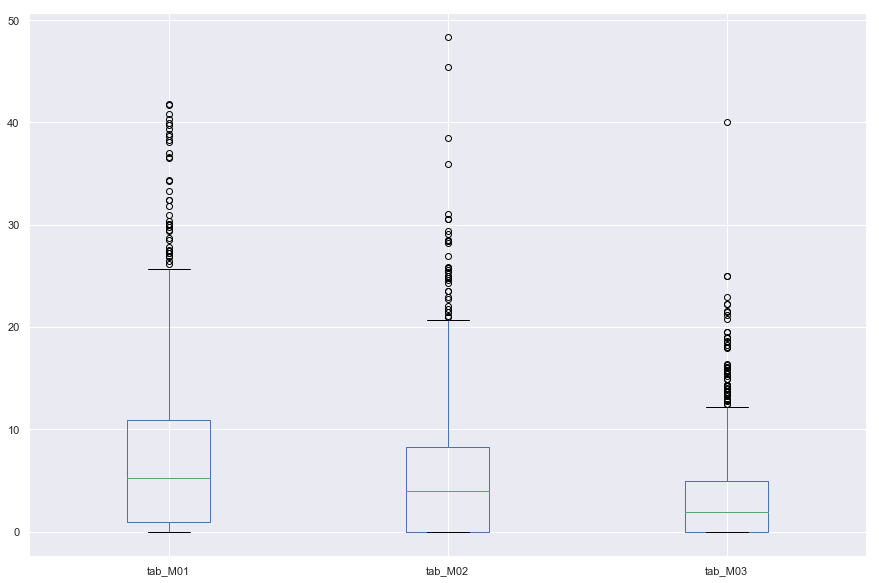

In [89]:
sns.set()
df_em_rj[['tab_M01', 'tab_M02', 'tab_M03']].boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a8786d8>,
      dtype=object)

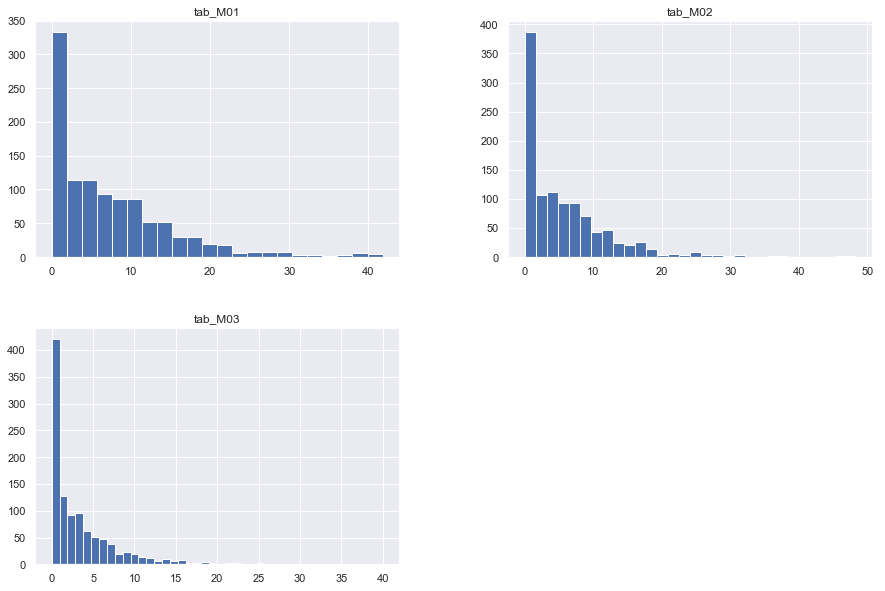

In [90]:
pylab.rcParams['figure.figsize'] = (15, 10)
df_em_rj[['tab_M01', 'tab_M02', 'tab_M03']].hist(bins='fd')

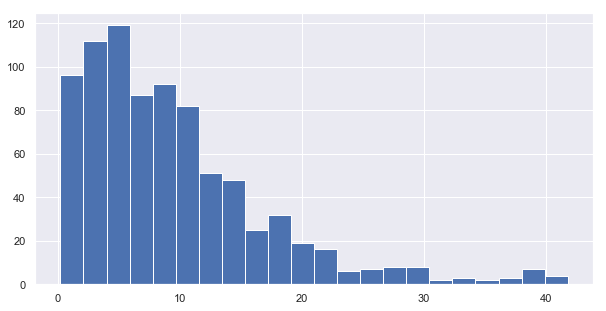

In [91]:
pylab.rcParams['figure.figsize'] = (10, 5)
df_em_rj[df_em_rj['tab_M01'] != 0]['tab_M01'].hist(bins='fd')

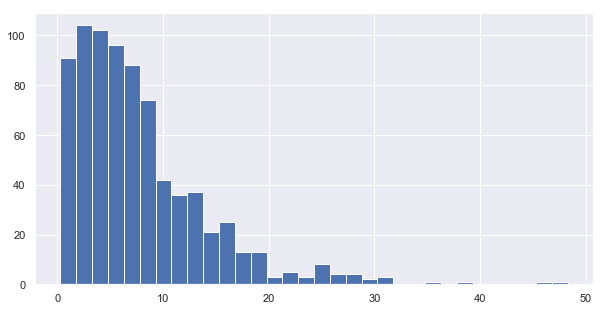

In [92]:
df_em_rj[df_em_rj['tab_M02'] != 0]['tab_M02'].hist(bins='fd')

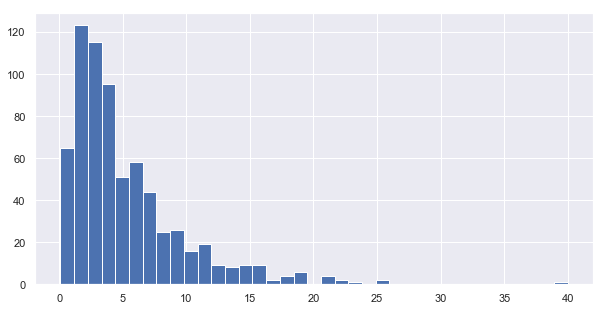

In [93]:
df_em_rj[df_em_rj['tab_M03'] != 0]['tab_M03'].hist(bins='fd')

### Quais são as escolas com maior e menor taxa de abandono?

In [182]:
from data_analysis import extreme_rank

#### 1º ano

* Menor abandono

In [188]:
cols = df_em_rj.columns[:5]
tab01_bottom_stats, tab01_bottom = extreme_rank(df_em_rj, 'tab_M01', n=30, keep=cols)

In [190]:
tab01_bottom_stats

,#,%
Cantagalo,4,0.133333
Carmo,4,0.133333
Cordeiro,3,0.100000
São Fidélis,3,0.100000
Sapucaia,2,0.066667
São Gonçalo,2,0.066667
Conceição de Macabu,2,0.066667
Maricá,1,0.033333
Duas Barras,1,0.033333
Mesquita,1,0.033333


In [191]:
tab01_bottom

,Ano,CO_MUNICIPIO,NO_MUNICIPIO,NO_ENTIDADE,TIPOLOCA,tab_M01
CO_ENTIDADE,,,,,,
33056471.0,2018,3303302.0,Niterói,CE JOSE BONIFACIO,Urbana,0.0
33006660.0,2018,3303005.0,Miracema,IE DE MIRACEMA,Urbana,0.0
33012393.0,2018,3304805.0,São Fidélis,CE DE SAO FIDELIS,Urbana,0.0
33018804.0,2018,3301108.0,Cantagalo,CIEP 277 JOAO NICOLAO FILHO - JANJAO,Urbana,0.0
33038589.0,2018,3302908.0,Miguel Pereira,CE VERA CRUZ,Rural,0.0
33019223.0,2018,3301108.0,Cantagalo,CE JOAO DE ABREU JUNIOR,Urbana,0.0
33019290.0,2018,3301108.0,Cantagalo,CE CONDE DE NOVA FRIBURGO,Urbana,0.0
33019428.0,2018,3301108.0,Cantagalo,CE DOUTOR FRANCISCO LEITE TEIXEIRA,Urbana,0.0
33012407.0,2018,3304805.0,São Fidélis,CE MONTESE,Urbana,0.0


* Escolas sem abandono: 23% do total

In [199]:
df_em_rj[df_em_rj['tab_M01'] == 0]['NO_MUNICIPIO'].value_counts()

Rio de Janeiro                 30
São Gonçalo                    17
Nova Friburgo                  14
Nova Iguaçu                    13
Campos dos Goytacazes          12
Itaperuna                      10
Niterói                         9
São João de Meriti              8
Duque de Caxias                 8
Bom Jesus do Itabapoana         6
Santo Antônio de Pádua          5
Itaocara                        5
Cachoeiras de Macacu            5
São João da Barra               5
Cantagalo                       4
Carmo                           4
Barra do Piraí                  4
Nilópolis                       4
Três Rios                       4
Belford Roxo                    3
Itaboraí                        3
Trajano de Moraes               3
Miracema                        3
Sapucaia                        3
Porciúncula                     3
Cordeiro                        3
Duas Barras                     3
São Francisco de Itabapoana     3
São Fidélis                     3
Angra dos Reis

In [202]:
sum(df_em_rj[df_em_rj['tab_M01'] == 0]['NO_MUNICIPIO'].value_counts())/len(df_em_rj)

0.23026926648096566

* Maior abandono

In [192]:
tab01_top_stats, tab01_top = extreme_rank(df_em_rj, 'tab_M01', n=30, bottom=False, keep=cols)

In [193]:
tab01_top_stats

,#,%
Rio de Janeiro,21,0.700000
Volta Redonda,2,0.066667
Magé,2,0.066667
Duque de Caxias,2,0.066667
Campos dos Goytacazes,1,0.033333
Barra Mansa,1,0.033333
Itaboraí,1,0.033333


In [195]:
tab01_top

,Ano,CO_MUNICIPIO,NO_MUNICIPIO,NO_ENTIDADE,TIPOLOCA,tab_M01
CO_ENTIDADE,,,,,,
33071578.0,2018,3304557.0,Rio de Janeiro,CE FRANCISCO JOBIM,Urbana,41.8
33117950.0,2018,3304557.0,Rio de Janeiro,CE PROFESSOR AUGUSTO MOTTA,Urbana,41.7
33053359.0,2018,3302502.0,Magé,CIEP 127 FREI ACURSIO ALOISIO GONZAGA BOLWER,Urbana,40.8
33082022.0,2018,3304557.0,Rio de Janeiro,CE FRANCISCO CALDEIRA DE ALVARENGA,Urbana,40.3
33106584.0,2018,3304557.0,Rio de Janeiro,CIEP 336 OCTAVIO MALTA,Urbana,39.9
33127395.0,2018,3304557.0,Rio de Janeiro,CE MINISTRO OROZIMBO NONATO,Urbana,39.7
33087750.0,2018,3304557.0,Rio de Janeiro,CE ALMIRANTE TAMANDARE,Urbana,39.3
33051070.0,2018,3302502.0,Magé,CIEP 444 ISRAEL JACOB AVERBACK,Rural,38.9
33097178.0,2018,3301900.0,Itaboraí,CIEP 451 ELIZA ANTONIA RAINHO DIAS,Rural,38.7


## Taxa de reprovação

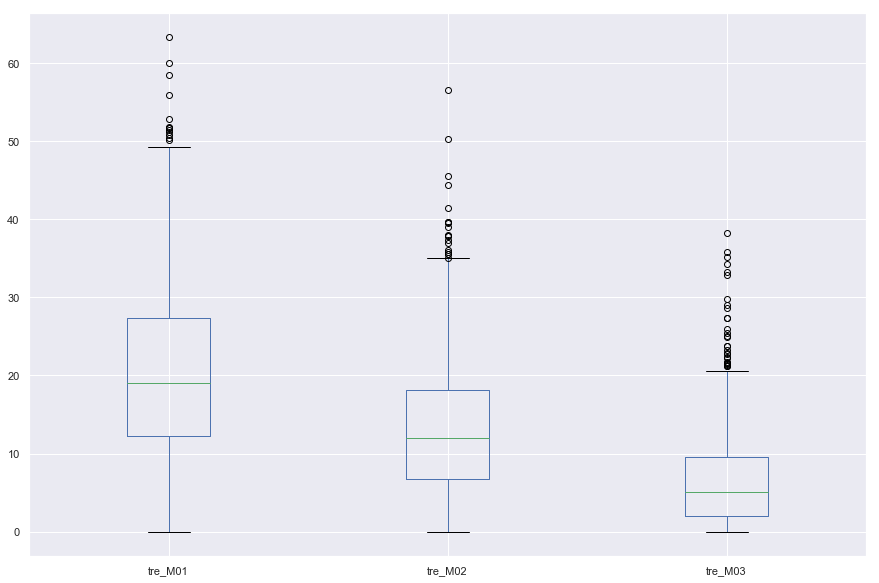

In [241]:
sns.set()
df_em_rj[['tre_M01', 'tre_M02', 'tre_M03']].boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12ec69048>,
      dtype=object)

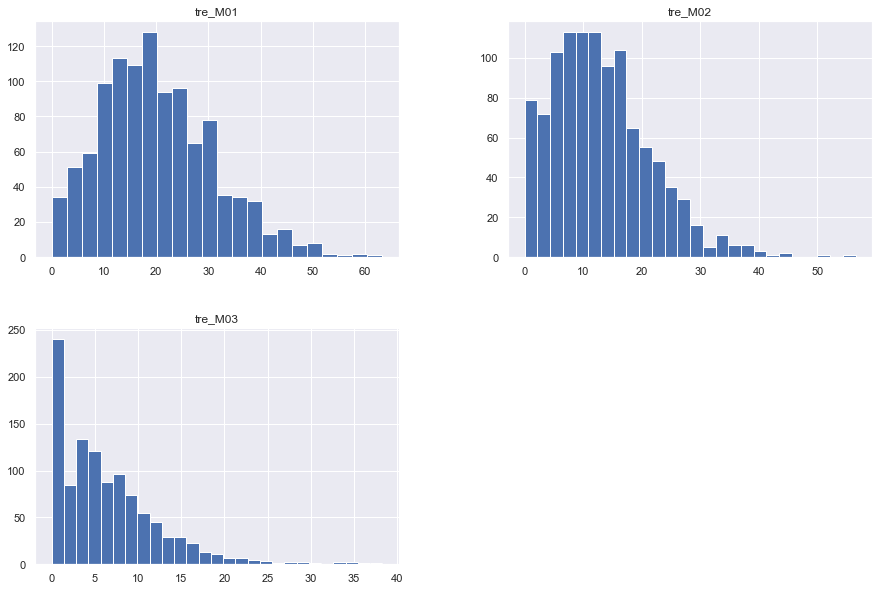

In [240]:
pylab.rcParams['figure.figsize'] = (15, 10)
df_em_rj[['tre_M01', 'tre_M02', 'tre_M03']].hist(bins='fd')

In [243]:
df_em_rj['tre_M01'].describe()

count    1077.000000
mean       20.159146
std        10.958722
min         0.000000
25%        12.200000
50%        19.000000
75%        27.300000
max        63.300000
Name: tre_M01, dtype: float64

In [247]:
df_em_rj[df_em_rj['tre_M01'] > 50]

,Ano,CO_MUNICIPIO,NO_MUNICIPIO,NO_ENTIDADE,TIPOLOCA,Dependad,tap_FUN,tap_F14,tap_F04,tap_F58,tap_F00,tap_F01,tap_F02,tap_F03,tap_F05,tap_F06,tap_F07,tap_F08,tap_MED,tap_M01,tap_M02,tap_M03,tap_M04,tap_MNS,tre_FUN,tre_F14,tre_F04,tre_F58,tre_F00,tre_F01,tre_F02,tre_F03,tre_F05,tre_F06,tre_F07,tre_F08,tre_MED,tre_M01,tre_M02,tre_M03,tre_M04,tre_MNS,tab_FUN,tab_F14,tab_F04,tab_F58,tab_F00,tab_F01,tab_F02,tab_F03,tab_F05,tab_F06,tab_F07,tab_F08,tab_MED,tab_M01,tab_M02,tab_M03,tab_M04,tab_MNS
CO_ENTIDADE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
33135860.0,2018,3300100.0,Angra dos Reis,CE PEDRO SOARES,Rural,Estadual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.7,37.9,65.2,93.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.4,51.7,17.4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.9,10.4,17.4,6.7,NaN,NaN
33166412.0,2018,3302601.0,Mangaratiba,CE CAETANO DE OLIVEIRA,Urbana,Estadual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.5,30.6,79.2,84.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.2,52.8,20.8,7.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.3,16.6,0.0,7.7,NaN,NaN
33062676.0,2018,3304557.0,Rio de Janeiro,CE SOUZA AGUIAR,Urbana,Estadual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.1,41.5,61.7,84.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.8,58.5,37.9,15.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1,0.0,0.4,0.0,NaN,NaN
33069026.0,2018,3304557.0,Rio de Janeiro,CE RUY BARBOSA,Urbana,Estadual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.2,41.5,66.7,52.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.6,50.4,21.9,35.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.2,8.1,11.4,12.1,NaN,NaN
33079382.0,2018,3304557.0,Rio de Janeiro,CE NICARAGUA,Urbana,Estadual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.3,48.2,63.9,85.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.4,51.2,36.1,14.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3,0.6,0.0,0.0,NaN,NaN
33079706.0,2018,3304557.0,Rio de Janeiro,CE DALVA DE OLIVEIRA,Urbana,Estadual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.2,48.6,51.9,88.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.2,51.4,23.1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.6,0.0,25.0,11.1,NaN,NaN
33079803.0,2018,3304557.0,Rio de Janeiro,CE MARIETA CUNHA DA SILVA,Urbana,Estadual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.1,43.9,60.1,70.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.1,51.8,35.1,23.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.8,4.3,4.8,6.0,NaN,NaN
33085498.0,2018,3304557.0,Rio de Janeiro,CE PREFEITO MENDES DE MORAES,Urbana,Estadual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,49.3,62.6,81.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.7,50.1,37.4,18.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3,0.6,0.0,0.0,NaN,NaN
33086567.0,2018,3304557.0,Rio de Janeiro,CE GRACILIANO RAMOS,Urbana,Estadual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.8,36.0,48.3,77.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.6,60.0,20.7,22.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.6,4.0,31.0,0.0,NaN,NaN


### Quais são as escolas com maior e menor taxa de reprovação no EM?

#### 1º ano

* Maior reprovação

In [248]:
tre01_top_stats, tre01_top = extreme_rank(df_em_rj, 'tre_M01', n=30, bottom=False, keep=cols)

In [249]:
tre01_top_stats

,#,%
Rio de Janeiro,24,0.800000
Niterói,2,0.066667
São Gonçalo,2,0.066667
Mangaratiba,1,0.033333
Angra dos Reis,1,0.033333


In [250]:
tre01_top

,Ano,CO_MUNICIPIO,NO_MUNICIPIO,NO_ENTIDADE,TIPOLOCA,tre_M01
CO_ENTIDADE,,,,,,
33097038.0,2018,3304557.0,Rio de Janeiro,CIEP 326 PROFESSOR CESAR PERNETTA,Urbana,63.3
33086567.0,2018,3304557.0,Rio de Janeiro,CE GRACILIANO RAMOS,Urbana,60.0
33062676.0,2018,3304557.0,Rio de Janeiro,CE SOUZA AGUIAR,Urbana,58.5
33096759.0,2018,3304557.0,Rio de Janeiro,CIEP 173 RAINHA NZINGA ANGOLA,Urbana,55.9
33166412.0,2018,3302601.0,Mangaratiba,CE CAETANO DE OLIVEIRA,Urbana,52.8
33079803.0,2018,3304557.0,Rio de Janeiro,CE MARIETA CUNHA DA SILVA,Urbana,51.8
33135860.0,2018,3300100.0,Angra dos Reis,CE PEDRO SOARES,Rural,51.7
33087733.0,2018,3304557.0,Rio de Janeiro,CE GOLDA MEIR,Urbana,51.7
33079706.0,2018,3304557.0,Rio de Janeiro,CE DALVA DE OLIVEIRA,Urbana,51.4


* Menor reprovação

In [251]:
cols = df_em_rj.columns[:5]
tre01_bottom_stats, tre01_bottom = extreme_rank(df_em_rj, 'tre_M01', n=30, keep=cols)

In [252]:
tre01_bottom_stats

,#,%
Valença,3,0.100000
Nova Friburgo,3,0.100000
Itaperuna,2,0.066667
São João da Barra,2,0.066667
Porciúncula,2,0.066667
Duas Barras,1,0.033333
Natividade,1,0.033333
Nova Iguaçu,1,0.033333
Cambuci,1,0.033333
São João de Meriti,1,0.033333


In [253]:
tre01_bottom

,Ano,CO_MUNICIPIO,NO_MUNICIPIO,NO_ENTIDADE,TIPOLOCA,tre_M01
CO_ENTIDADE,,,,,,
33027293.0,2018,3300704.0,Cabo Frio,CIEP 150 PROFESSORA AMELIA FERREIRA DOS SANTOS...,Urbana,0.0
33131163.0,2018,3303104.0,Natividade,CE CORONEL JOSE ROSA DA SILVA,Urbana,0.0
33020434.0,2018,3302452.0,Macuco,CE FARMACEUTICO RODOLFO ALBINO,Urbana,0.0
33013691.0,2018,3305000.0,São João da Barra,CE DOUTOR OLIMPIO SATURNINO DE BRITO,Rural,0.0
33031711.0,2018,3304201.0,Resende,CE ANIBAL BENEVOLO,Urbana,0.0
33035628.0,2018,3306107.0,Valença,CE ALMIRANTE RODRIGUES SILVA,Urbana,0.0
33005362.0,2018,3300902.0,Cambuci,CE WALDEMIRO PITA,Rural,0.0
33013683.0,2018,3305000.0,São João da Barra,CE RAIMUNDO DE MAGALHAES,Urbana,0.0
33149178.0,2018,3305703.0,Sumidouro,CE CAMPINAS II,Rural,0.0


* Escolas sem reprovação: 2,5% do total

In [254]:
df_em_rj[df_em_rj['tre_M01'] == 0]['NO_MUNICIPIO'].value_counts()

Valença                    3
Nova Friburgo              3
Itaperuna                  2
São João da Barra          2
Porciúncula                2
Duas Barras                1
Natividade                 1
Cambuci                    1
Sumidouro                  1
Miguel Pereira             1
São João de Meriti         1
Macuco                     1
Seropédica                 1
São Gonçalo                1
Cardoso Moreira            1
Cabo Frio                  1
Bom Jesus do Itabapoana    1
Campos dos Goytacazes      1
Resende                    1
Duque de Caxias            1
Name: NO_MUNICIPIO, dtype: int64

In [255]:
sum(df_em_rj[df_em_rj['tre_M01'] == 0]['NO_MUNICIPIO'].value_counts())/len(df_em_rj)

0.025069637883008356

## Cruzamentos

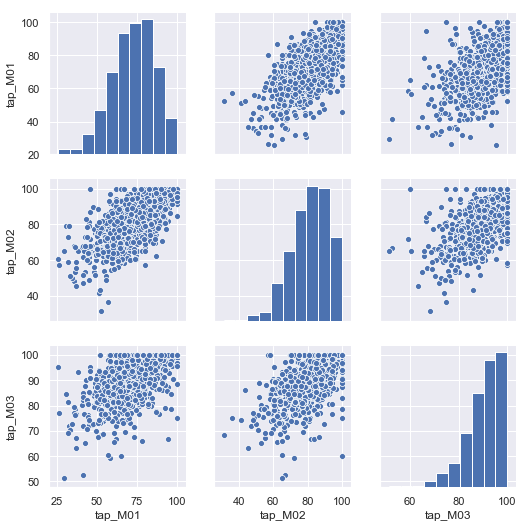

In [236]:
pylab.rcParams['figure.figsize'] = (20, 20)
sns.pairplot(df_em_rj[['tap_M01', 'tap_M02', 'tap_M03']])

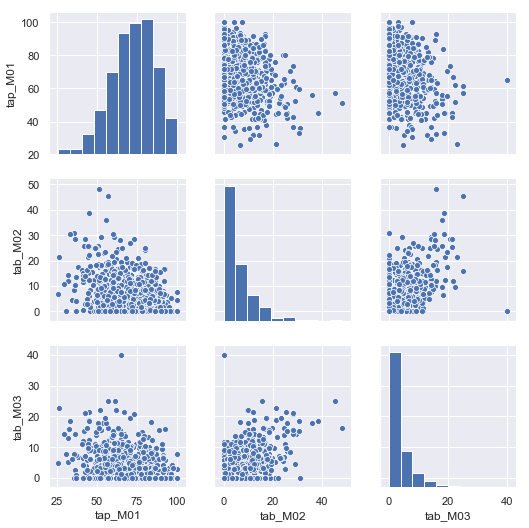

In [237]:
sns.pairplot(df_em_rj[['tap_M01', 'tab_M02', 'tab_M03']])

In [238]:
df_em_rj[(df_em_rj['tab_M02'] == 0) & (df_em_rj['tab_M03'] > 30)]

,Ano,CO_MUNICIPIO,NO_MUNICIPIO,NO_ENTIDADE,TIPOLOCA,Dependad,tap_FUN,tap_F14,tap_F04,tap_F58,tap_F00,tap_F01,tap_F02,tap_F03,tap_F05,tap_F06,tap_F07,tap_F08,tap_MED,tap_M01,tap_M02,tap_M03,tap_M04,tap_MNS,tre_FUN,tre_F14,tre_F04,tre_F58,tre_F00,tre_F01,tre_F02,tre_F03,tre_F05,tre_F06,tre_F07,tre_F08,tre_MED,tre_M01,tre_M02,tre_M03,tre_M04,tre_MNS,tab_FUN,tab_F14,tab_F04,tab_F58,tab_F00,tab_F01,tab_F02,tab_F03,tab_F05,tab_F06,tab_F07,tab_F08,tab_MED,tab_M01,tab_M02,tab_M03,tab_M04,tab_MNS
CO_ENTIDADE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
33093946.0,2018,3301009.0,Campos dos Goytacazes,CIEP 466 NINA ARUEIRA,Urbana,Estadual,50.2,NaN,50.2,NaN,NaN,NaN,NaN,NaN,46.4,46.7,63.3,47.5,76.1,65.0,100.0,60.0,NaN,NaN,37.8,NaN,37.8,NaN,NaN,NaN,NaN,NaN,33.3,41.3,30.6,47.5,2.2,5.0,0.0,0.0,NaN,NaN,12.0,NaN,12.0,NaN,NaN,NaN,NaN,NaN,20.3,12.0,6.1,5.0,21.7,30.0,0.0,40.0,NaN,NaN


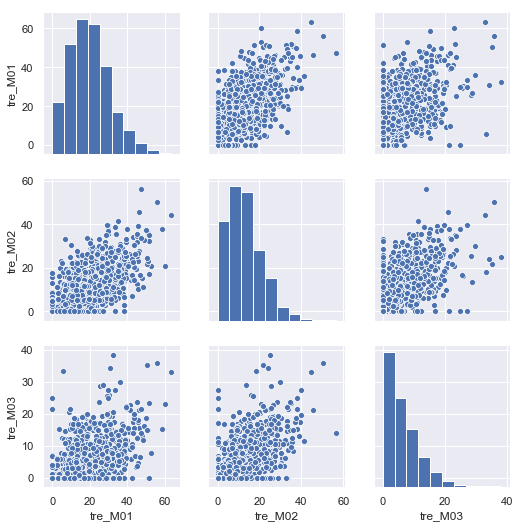

In [235]:
sns.pairplot(df_em_rj[['tre_M01', 'tre_M02', 'tre_M03']])